## Question 1

### (A)

In [1]:
#Import necessary Python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
X =  np.array([0,1,3,4,8,9]).reshape(-1,1)

In [11]:
print(X)

[[0]
 [1]
 [3]
 [4]
 [8]
 [9]]


In [12]:
from sklearn.cluster import AgglomerativeClustering
clustering1 = AgglomerativeClustering(n_clusters=3,linkage='ward').fit(X)
clustering1.labels_

array([2, 2, 1, 1, 0, 0], dtype=int64)

In [13]:
def plot_dendrogram(model, **kwargs):
    from scipy.cluster.hierarchy import dendrogram, linkage
    from sklearn.cluster import AgglomerativeClustering
    from sklearn.datasets import load_iris
    # Children of hierarchical clustering
    children = model.children_
    distance = np.arange(children.shape[0])
    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)
    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    return

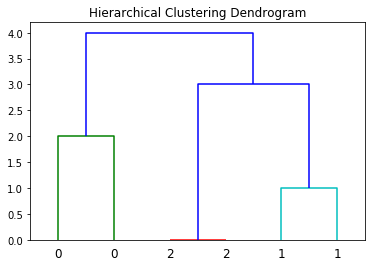

In [14]:
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clustering1, labels=clustering1.labels_)
plt.show()

### (C)

In [16]:
#Train k-means model

from sklearn.cluster import KMeans
kinit = np.array([[3,3],[4,4]])
kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000,init = kinit).fit(X)
print(kmeans.labels_)
##For a new data point, predict which cluster it belongs to.
print(kmeans.predict(X))
##The center of each cluster
print(kmeans.cluster_centers_)

[0 0 0 1 1 1]
[0 0 0 1 1 1]
[[1.33333333 2.        ]
 [7.         5.        ]]


C:\Users\pc\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


## Question 2

In [15]:
stock = pd.read_csv("D:/study/Business Analytics/LA/HW5/stock.csv")
stock_data = np.array(stock)
stock.head()

,ReturnJan,ReturnFeb,ReturnMar,ReturnApr,ReturnMay,ReturnJune,ReturnJuly,ReturnAug,ReturnSep,ReturnOct,ReturnNov,PositiveDec
0,0.080678,0.066250,0.032941,0.183099,0.130334,-0.017642,-0.020517,0.024676,-0.020408,-0.173318,-0.025385,0
1,-0.010680,0.102115,0.145496,-0.084428,-0.327300,-0.359266,-0.025321,0.211290,-0.580003,-0.267141,-0.151235,0
2,0.047742,0.035990,0.039702,-0.162353,-0.147427,0.048589,-0.135385,0.033392,0.000000,0.091696,-0.059561,0
3,-0.074040,-0.048170,0.018219,-0.024679,-0.006036,-0.025304,-0.094000,0.095290,0.056680,-0.096339,-0.040512,1
4,-0.031046,-0.212677,0.091476,0.189338,-0.153846,-0.106115,0.355301,0.056842,0.033602,0.036269,-0.085305,1


In [4]:
print(stock_data.shape)

(11580, 12)


### (A)

In [5]:
# perform a train-test split
from sklearn.model_selection import train_test_split
y = stock_data[:,-1].astype('int')
X = stock_data[:,:-1]
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

(11580, 11)


In [83]:
# use gridserchCV to train-validate

from sklearn.model_selection import GridSearchCV
param_test = {
        'C':np.logspace(-3, 3)
    }
estimator = linear_model.LogisticRegression(penalty='l1')  
gsearch = GridSearchCV( estimator , param_grid = param_test, cv=10 ,scoring='accuracy')
gsearch.fit(X_train,y_train)
gsearch.best_params_, gsearch.best_score_
print('best score is:',str(gsearch.best_score_))
print('best params are:',str(gsearch.best_params_))

best score is: 0.5705958549222798
best params are: {'C': 0.28117686979742307}


In [84]:
# retrain & test
model1 = linear_model.LogisticRegression(C = gsearch.best_params_['C'] ,penalty='l1') 
model1.fit(X_train,y_train)
y_pred_prob = model1.predict_proba(X_test)

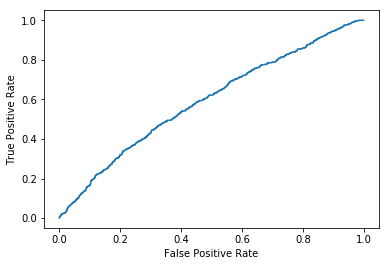

0.5907774536636896

In [85]:
#Calculate out-of-sample AUC
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(y_test.astype('int'), y_pred_prob[:,1])
#Draw the ROC curve
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
auc(fpr, tpr)

### (B)

Yes, because clustering is unsupervised learning. We only need the covariates to do clustering.

In [86]:
#Train k-means model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0, max_iter=1000,init='k-means++').fit(X)
##The center of each cluster
print(kmeans.cluster_centers_)

[[-0.06098517 -0.02360366  0.00862434 -0.01549287  0.02086098 -0.06861215
   0.02179498  0.04625726 -0.08123911 -0.15815268 -0.12199515]
 [-0.08785803 -0.09473223  0.09557897  0.26717255  0.10078986  0.02175104
   0.11099188  0.02187745  0.02498859 -0.00604045  0.02627292]
 [ 0.1879103   0.72977297 -0.16715353 -0.13741103 -0.11535077  0.38356437
  -0.08601622  0.16585321 -0.06156155 -0.12685151 -0.19878084]
 [ 0.22445861 -0.1184661   0.01137643  0.06783583  0.01996753 -0.02292267
  -0.06736731 -0.03204768 -0.14833581  0.235639    0.18021851]
 [ 0.01618383  0.00596858  0.01446306 -0.01017807  0.0160668   0.0147528
  -0.01013865  0.00923278  0.01553022  0.02295309  0.02656583]]


### (B)

Because k-means clustering is based on distances. The distances of datapoint can only be measured accurately after being standardized.

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_new = scaler.fit_transform(X)
print(X_new)

[[ 0.40267501  0.39098215  0.08584079 ... -0.03876745 -1.01974525
  -0.23263258]
 [-0.1379494   0.58085103  0.79947587 ... -3.85318102 -1.5543428
  -1.02878282]
 [ 0.20777089  0.23078629  0.12870816 ...  0.10034237  0.49027408
  -0.44883635]
 ...
 [-0.89544636 -0.97665415  1.33045318 ...  1.06352668 -0.90421538
  -0.10009366]
 [-0.86837105 -0.57991271  4.34962273 ...  0.33285807 -1.31994384
   0.26322111]
 [ 8.42239827 -1.20381465 -0.38357908 ...  1.65258762 -0.15755182
  -0.33291457]]


### (D)


In [95]:
X_train, X_test = train_test_split(X_new, test_size=0.2)

In [96]:
kmeans = KMeans(n_clusters=3, random_state=0, max_iter=1000,init='k-means++').fit(X_train)
from collections import Counter
print(kmeans.n_iter_)
print(Counter(kmeans.labels_))
print(kmeans.cluster_centers_[:,0])

46
Counter({0: 7244, 2: 1725, 1: 295})
[-0.22487783  0.80435167  0.81714549]


### (E)

In [90]:
y = kmeans.fit_predict(X_test)
print(Counter(y))
clusters_indices = defaultdict(list)
for index, c  in enumerate(y):
    clusters_indices[c].append(index)
for i in range(3):
    mean = 0
    for j in range(len(clusters_indices[i])):
        mean += X[clusters_indices[i][j],0]
    mean = mean/len(clusters_indices[i])
    print("class",i,"mean: ",mean)

Counter({1: 1376, 0: 849, 2: 91})
class 0 mean:  0.07267694506124855
class 1 mean:  0.08028006355886619
class 2 mean:  0.10769091225274728


### (F)

In [78]:
def trainROC(X,y,X_train,y_train):
    from sklearn.model_selection import GridSearchCV
    param_test = {
        'C':np.logspace(-3, 3)
        }
    estimator = linear_model.LogisticRegression(penalty='l1')  
    gsearch = GridSearchCV( estimator , param_grid = param_test, cv=10 ,scoring='accuracy')
    gsearch.fit(X_train,y_train)
    gsearch.best_params_, gsearch.best_score_
    model1 = linear_model.LogisticRegression(C = gsearch.best_params_['C'] ,penalty='l1') 
    model1.fit(X_train,y_train)
    y_pred_prob = model1.predict_proba(X_test)
    #Calculate out-of-sample AUC
    from sklearn.metrics import roc_curve,auc
    fpr, tpr, thresholds = roc_curve(y_test.astype('int'), y_pred_prob[:,1])
    #Draw the ROC curve
    plt.plot(fpr,tpr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    print(auc(fpr, tpr))